<a href="https://colab.research.google.com/github/lsartori22/detector/blob/main/detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detector Example

## Downloading the Tensorflow Object detection API 
First of all, let's download the [tensorflow models ](https://github.com/tensorflow/models/) repository, <br> inside this repository has the objection detection api, that we will <br>use to train our ownobject detection model.
<br>Everything that we will do, is inside the path models/research/object_detection.

In [ ]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install opencv-python
!pip install tensorflow

In [25]:
pip install tf_slim

     |████████████████████████████████| 358kB 5.3MB/s 


In [14]:
!git clone https://github.com/tensorflow/models/
%cd models/research/object_detection

Cloning into 'models'...
remote: Enumerating objects: 47486, done.
remote: Total 47486 (delta 0), reused 0 (delta 0), pack-reused 47486
Receiving objects: 100% (47486/47486), 551.80 MiB | 32.15 MiB/s, done.
Resolving deltas: 100% (32703/32703), done.
/content/models/research/models/research/object_detection


Here we're just creating some folders that we will use it later.
The command mkdir creates directories

In [16]:
!mkdir training
!mkdir inference_graph
!mkdir -p images/train
!mkdir -p images/test

mkdir: cannot create directory ‘training’: File exists
mkdir: cannot create directory ‘inference_graph’: File exists


# Choosing our pre-trained model.
Inside the the [tensorflow zoo models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) we can choose a pre-trained <br>model to dowloand and use it to train our own dataset.<br>
Inside the tensorlfow zoo models repository's folder, we have a table <br>that explain how precise the model is (with mAP - mean Average Precision )<br> and how faster  this model is.<br>
You can choose any model that you want, the process in this tutorial for others<br> models is the same.<br>
For this tutorial, I choosed the faster_rcnn_inception_v2_coco_2018_01_28, just<br> because I want :)

<img src="https://i.imgur.com/D17bpFZ.png" width="600">

In [17]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvzf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!rm -rf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2020-11-19 19:05:10--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.120.128, 2607:f8b0:4001:c18::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.120.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   194MB/s    in 0.7s    

2020-11-19 19:05:11 (194 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/mo

According to the documentation, it is important that we export the PYTHONPATH environment variable with the models, reasearch and slim path

In [18]:
import os
os.environ['PYTHONPATH'] = "{}/content/obj_detect_api/models:/content/obj_detect_api/models/research:/content/obj_detect_api/models/research/slim".format(os.environ['PYTHONPATH'])

# Compiling something
Here we have some proto buffers that need to be compiled, remember <br>that it's compiled, so if you switch machines, you can't just copy and paste<br> the files generated by this guy.<br>
Being sincere I couldn't execute these protos from the "/research/object_detection" <br>folder, I tried N ways and it didn't work, so I simply compiled them from within the <br>"/research" folder.<br>
to understand what's proto buffers is not necessary for this tutorial, but if you want<br> to learn more about, I recommend you look the [documentation](https://developers.google.com/protocol-buffers/), basically it's text<br> structures (such as json, xml) containing message structures that you can transform<br> it to some languages, is a little more than that, but for now that's more than enough <br>for you to follow that article.

In [19]:
%cd ..

!protoc ./object_detection/protos/*.proto --python_out=.

/content/models/research/models/research


I don't remember the exact version that the Tensroflow Objection detect API<br> require, but I know from version >= 3.0 works well.

In [20]:
!protoc --version

libprotoc 3.0.0


In [21]:
!python3 setup.py build
!python3 setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/__init__.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/exporter_lib_v2.py -> build/lib/object_detection
copying object_detection/model_main_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/model_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/model_lib_v2.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/exporter_main_v2.py -> build/lib/object_dete

# Test if the instalation is working.
Once we have installed everything, we can run some sample scripts from the<br> Tensorflow Object detection API to verify if everything is correct.<br>
this code isn't mine, I copied  it from object_detection folder just to make some<br> modifications ro run it on jupyter notebook.

I don't will explain this code because it's is justo to test the instalation, we will <br>see a similar code later.

Just execute these cells.

Just certify that you are using the Tensorflow >=1.12.0

In [33]:
import numpy as np
import os
import sys
import tarfile
from PIL import Image
import tensorflow as tf
import six.moves.urllib as urllib
from matplotlib import pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import ops as utils_ops
from object_detection.utils import visualization_utils as vis_util
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline

  
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('object_detection','data', 'mscoco_label_map.pbtxt')

opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.compat.v1.GraphDef()
  with tf.compat.v2.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

# If after you execute the cell bellow you can see a dog image and a beach image, everything is working!

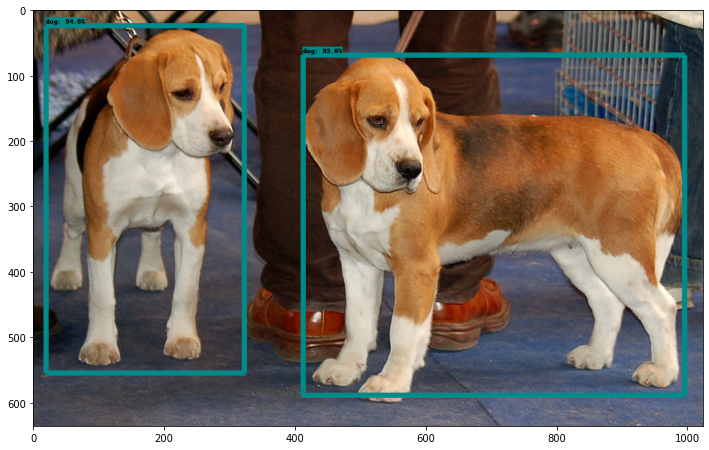

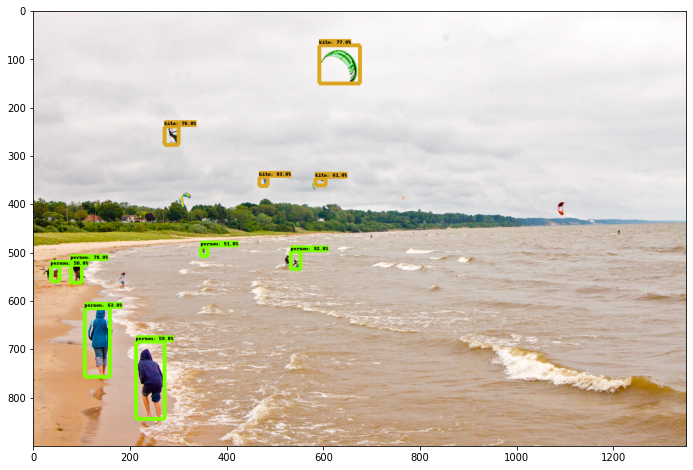

In [34]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=(IMAGE_SIZE))
  plt.imshow(image_np)

# Training the model with our own dataset.

First of all let's download our dataset.
### About the dataset
In this article we will use a dataset from kaggle, but don't worry, during this tutorial I will direct <br>you to another articl that teaches you how to create your own classified dataset.

#### Pascal-VOC
Before talking about the dataset, I want to just to remember you that in this tutorial we will use <br> datasets in the Pascal-VOC format, this is famous format where you have:
- Images in jpg, jpeg, png format ...
- Annotations: .xml files in the following format:

``` xml
<annotation>
	<folder>GeneratedData_Train</folder>
	<filename>000001.png</filename>
	<path>/my/path/GeneratedData_Train/000001.png</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>224</width>
		<height>224</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>21</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<bndbox>
			<xmin>82</xmin>
			<xmax>172</xmax>
			<ymin>88</ymin>
			<ymax>146</ymax>
		</bndbox>
	</object>
</annotation>
```

For each image, we have an .xml with the same name, example: image001.png -> image001.xml<br>
Note inside this .xml we have others informations about our image like location, size, objects and <br>their locations inside that image...

The dataset we are using in this article is the [ LISA Traffic Light Dataset](https://https://www.kaggle.com/mbornoe/lisa-traffic-light-dataset) extracted from kaggle, this <br> dataset contains images and classifications of traffic lights with the following classes:

- go;
- stop;
- warning;
- goLeft;
- goForward;
- stopLeft;
- warningLeft;

But for this tutorial to be simpler, I modified the classes so that we only have:
- go;
- stop;
- warning;

After the dowloand, note that we are moving everything into the folder ... / images


In [ ]:
%cd object_detection
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15WlpBbq4EpxUxZeKEAbfI_YJABASpmFs' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15WlpBbq4EpxUxZeKEAbfI_YJABASpmFs" -O lisa608.zip
!unzip -qq ./lisa608.zip

!mv images_output/* images/
!mv annotations_output/* images/

For this simple tutorial, I do not want to work with many classe, you can do this, but to simplify the process here I will rename all the classes that have "Left" and "Forward" at the end

In [ ]:
import xml.etree.ElementTree as ET
import glob
for file in glob.glob("images/*.xml"):
  xmlRoot = ET.parse(file).getroot()

  for member in xmlRoot.findall('object'):
    member.find('name').text = member.find('name').text.replace('Left', '').replace('Forward','')

  tree = ET.ElementTree(xmlRoot)
  tree.write(file)

Here I just split my datset in train and test

In [ ]:
import glob
import os
os.chdir('images')
test = len(os.listdir('.'))//4
i = 0
for file in glob.glob("*.xml"):
  fileName = file.split('.')[0]
  if i > test:
    os.rename("{}.xml".format(fileName), 'train/{}.{}'.format(fileName,"xml"))
    os.rename("{}.jpg".format(fileName), 'train/{}.{}'.format(fileName,"jpg"))
  else:
    os.rename("{}.xml".format(fileName), 'test/{}.{}'.format(fileName,"xml"))
    os.rename("{}.jpg".format(fileName), 'test/{}.{}'.format(fileName,"jpg"))
  i +=1

Get back to object_detection folder.

In [ ]:
%cd ..

If your annotations are in Pascal-VOC format (as is our case) you will need to convert them into csv.

I know, our original dataset was already in csv before, but I've converted it to xml just to show you this scenario.<br>
Here we iterate about each folder, train, test and validation (if we had data for validation) so we extracted the data:
*   filename
*   width
*   height
*   class
*   xmin
*   ymin
*   xmax
*   ymax 

and put it on a line from our csv.

# XML2CSV

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(float(member[4][0].text)),
                     int(float(member[4][1].text)),
                     int(float(member[4][2].text)),
                     int(float(member[4][3].text))
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    for folder in ['train','test']:
        image_path = os.path.join(os.getcwd(), ('images/' + folder))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv(('images/' + folder + '_labels.csv'), index=None)
        print('Successfully converted xml to csv.')


main()